In [99]:
import numpy as np
from datascience import *
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn import *
from sklearn.model_selection import train_test_split

from datetime import datetime, timezone
import missingno as msno
import seaborn as sns
import math
import statistics
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

import scipy.stats as stats
from scipy.stats import pearsonr
from sklearn.cross_decomposition import CCA



MAINDATAog = pd.read_csv('Participant_1058 (B).csv')
MAINDATAunixStartog = 1583259855
ShimmerDataog = pd.read_csv('1058_Shimmer1.csv')


C:\Users\Viraj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: DtypeWarning: Columns (60) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Viraj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [100]:
MAINDATA = pd.read_csv('Participant_1058 (B).csv')
MAINDATAunixStart = 1583259855

MAINDATA['1'] = (MAINDATA['1']/50)+MAINDATAunixStart

MAINDATA['1'] = MAINDATA['1'].round()
MAINDATA = MAINDATA.drop_duplicates('1', keep="first")

drop_cols = ['Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54',
       'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58',
       'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', '34']
MAINDATA = MAINDATA.drop(drop_cols, axis=1)
# MAINDATA = MAINDATA[MAINDATA['1'] > 1583260424]
MAINDATA['1']


0        1.583260e+09
25       1.583260e+09
76       1.583260e+09
125      1.583260e+09
176      1.583260e+09
             ...     
60676    1.583261e+09
60725    1.583261e+09
60776    1.583261e+09
60825    1.583261e+09
60876    1.583261e+09
Name: 1, Length: 1219, dtype: float64

In [101]:
ShimmerData = pd.read_csv('1058_Shimmer1.csv')
ShimmerData = ShimmerData.drop(0)
ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL']

ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL'] = ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL'].apply(lambda x: '{:.0f}'.format(float(x)) if isinstance(x, str) else x)

ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL'] = pd.to_numeric(ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL'])

ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL'] /= 1000

ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL'][1]


ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL'] = ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL'].round()
ShimmerData = ShimmerData.drop_duplicates('Shimmer_89C4_Timestamp_Unix_CAL', keep="first")

drop_cols = ['Unnamed: 16']
ShimmerData = ShimmerData.drop(drop_cols, axis=1)

ShimmerData


,Shimmer_89C4_Timestamp_Unix_CAL,Shimmer_89C4_Accel_LN_X_CAL,Shimmer_89C4_Accel_LN_Y_CAL,Shimmer_89C4_Accel_LN_Z_CAL,Shimmer_89C4_Accel_WR_X_CAL,Shimmer_89C4_Accel_WR_Y_CAL,Shimmer_89C4_Accel_WR_Z_CAL,Shimmer_89C4_GSR_Range_CAL,Shimmer_89C4_GSR_Skin_Conductance_CAL,Shimmer_89C4_GSR_Skin_Resistance_CAL,Shimmer_89C4_Gyro_X_CAL,Shimmer_89C4_Gyro_Y_CAL,Shimmer_89C4_Gyro_Z_CAL,Shimmer_89C4_Mag_X_CAL,Shimmer_89C4_Mag_Y_CAL,Shimmer_89C4_Mag_Z_CAL
1,1.583260e+09,-2.402173913043478,-0.8913043478260869,9.25,-5.357271095152603,-3.6481149012567324,7.861160981448235,0.0,2.5331219361070128,394.76978417266156,-0.0916030534351145,1.0381679389312977,-0.3969465648854962,0.2563718140929535,0.035982008995502246,0.15292353823088456
90,1.583260e+09,-1.9456521739130435,-0.8369565217391304,9.141304347826086,-4.85936564931179,-3.6074207061639734,7.727109515260323,2.0,2.438827838827839,410.0330429558426,0.47328244274809156,-0.41221374045801523,-2.687022900763359,0.2518740629685157,0.04047976011994003,0.14842578710644677
218,1.583260e+09,-2.119565217391304,-0.8695652173913043,9.619565217391305,-5.036505086774387,-3.6169958108916815,8.24655894673848,2.0,2.4256410256410255,412.262156448203,-1.2366412213740459,-11.603053435114504,0.8244274809160305,0.2563718140929535,0.041979010494752625,0.15292353823088456
346,1.583260e+09,-2.0978260869565215,-0.8260869565217391,9.032608695652174,-5.005385996409336,-3.576301615798923,7.626570915619389,2.0,2.405128205128205,415.77825159914715,-0.8396946564885496,5.374045801526718,2.610687022900763,0.2593703148425787,0.05697151424287856,0.14992503748125938
474,1.583260e+09,-2.380434782608696,-0.8369565217391304,9.358695652173912,-5.333333333333333,-3.595451825254339,7.961699581089168,2.0,2.383150183150183,419.61266523209343,2.0610687022900764,3.1755725190839694,0.48854961832061067,0.25037481259370314,0.04947526236881559,0.14692653673163417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150582,1.583261e+09,4.891304,8.652174,7.369565,2.551765,7.195691,5.934171,1.0,5.858253,170.699346,7.73187,0.936307,2.420324,-0.13943,-0.34033,0.0
150710,1.583261e+09,4.793478,8.880435,7.478261,2.463196,7.427887,6.077798,1.0,6.077778,164.533809,2.678435,4.92104,-1.732347,-0.155922,-0.355322,0.016492
150838,1.583261e+09,4.391304,9.608696,7.76087,1.967684,8.280072,6.333932,1.0,5.965463,167.631579,10.083015,-37.414838,-13.289599,-0.154423,-0.37931,0.04048
150966,1.583261e+09,7.130435,8.880435,5.01087,5.050868,7.492519,3.253142,1.0,6.016515,166.209164,7.625,-33.613311,16.817271,-0.295352,-0.385307,0.116942


In [102]:
unique_timestamps = MAINDATA['1'].unique()

# Filter 'ShimmerData' to include rows with matching timestamps
ShimmerData = ShimmerData[ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL'].isin(unique_timestamps)]

unique_timestamps = ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL'].unique()

# Filter 'MAINDATA' to include rows with matching timestamps
MAINDATA = MAINDATA[MAINDATA['1'].isin(unique_timestamps)]

MAINDATA

,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,33
2025,1.583260e+09,-6.780594,0.282685,-6.498009,-7.063249,0.748996,1.442933,2.191829,-0.693907,-3.919300,...,-0.542433,-1.641266,-2.628136,-2.571825,-5.199961,-0.056331,-1.539516,0.052994,-1.486421,-1.592480
2076,1.583260e+09,-6.876689,0.281064,-6.595725,-7.157723,0.601966,1.452193,2.054059,-0.850197,-3.986562,...,-0.795528,-1.862870,-2.820325,-2.575068,-5.395393,-0.245278,-1.689412,0.020579,-1.668732,-1.709961
2125,1.583260e+09,-6.950681,0.278748,-6.672034,-7.229399,0.543345,1.458675,2.001921,-0.915300,-4.090343,...,-1.029978,-2.045454,-2.976952,-2.597990,-5.574942,-0.378982,-1.853724,-0.006742,-1.860366,-1.846952
2176,1.583260e+09,-6.868047,0.299354,-6.568793,-7.167372,0.648081,1.478587,2.126569,-0.830476,-4.135503,...,-0.911890,-1.996363,-2.968311,-2.579699,-5.548010,-0.388631,-1.816250,0.001362,-1.814788,-1.817582
2225,1.583260e+09,-6.909386,0.342418,-6.567068,-7.251773,0.646128,1.557538,2.203567,-0.911380,-4.250833,...,-1.233007,-2.338312,-3.175872,-2.591741,-5.767613,-0.584151,-2.038228,-0.005586,-2.043714,-2.032612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60676,1.583261e+09,-12.602237,-13.831956,-26.434292,1.229749,4.254158,0.019531,4.273589,4.234658,-7.947717,...,1.050399,2.594173,2.957528,-1.656786,1.300742,4.614294,4.463071,-1.128674,3.334497,5.591775
60725,1.583261e+09,-12.709882,-13.786809,-26.496790,1.076957,3.893835,-0.066600,3.827135,3.960465,-8.187932,...,0.501740,2.326132,2.713449,-1.663039,1.050409,4.376468,4.067226,-1.301859,2.765467,5.369116
60776,1.583261e+09,-12.624339,-13.831261,-26.455700,1.206952,4.596202,0.161923,4.758024,4.434309,-7.554739,...,1.686414,2.868999,2.949842,-1.661185,1.288658,4.611007,4.534197,-1.168033,3.366264,5.702261
60825,1.583261e+09,-13.257533,-14.020192,-27.277826,0.762689,4.327153,0.114689,4.441742,4.212494,-7.450045,...,3.989114,2.935127,1.983289,-2.080951,-0.097663,4.064220,4.818575,-1.005267,3.813408,5.823873


In [103]:
ShimmerData = ShimmerData.reset_index(drop=True)
MAINDATA = MAINDATA.reset_index(drop=True)

In [104]:
def RProcess(col1, col2, s, p):
    x = col1.astype(float)
    y = col2.astype(float)

    # Calculate the correlation coefficient
    correlation_matrix = np.corrcoef(x, y)
    correlation = correlation_matrix[0, 1]

    if(p == 'p'):
        # Calculate the p-value
        _, p_value = stats.pearsonr(x, y)
        return [p_value, s]
    else:
        if(correlation > .89 or correlation < -.89):
            print(s)
            print("Correlation coefficient (r-value):", correlation)
        
        return [correlation, s]


def runThroughDfForRVal(df1, df2, p):
    result = []
    stringResult = []
    for i in range((df1.shape[1])):
        for j in range(df2.shape[1]):
            if(df1.columns[i] != 'Shimmer_89C4_Timestamp_Unix_CAL' and df2.columns[j] != '1'):
#                 print(df1.columns[i] + " and " + df2.columns[j])
                temp = RProcess(df1.iloc[:, i], df2.iloc[:, j], (df1.columns[i] , " and ", df2.columns[j]), p)
                result.append(temp[0])
                stringResult.append(temp[1])
                
    return [result, stringResult]
            
            

In [105]:
ShimmerData

,Shimmer_89C4_Timestamp_Unix_CAL,Shimmer_89C4_Accel_LN_X_CAL,Shimmer_89C4_Accel_LN_Y_CAL,Shimmer_89C4_Accel_LN_Z_CAL,Shimmer_89C4_Accel_WR_X_CAL,Shimmer_89C4_Accel_WR_Y_CAL,Shimmer_89C4_Accel_WR_Z_CAL,Shimmer_89C4_GSR_Range_CAL,Shimmer_89C4_GSR_Skin_Conductance_CAL,Shimmer_89C4_GSR_Skin_Resistance_CAL,Shimmer_89C4_Gyro_X_CAL,Shimmer_89C4_Gyro_Y_CAL,Shimmer_89C4_Gyro_Z_CAL,Shimmer_89C4_Mag_X_CAL,Shimmer_89C4_Mag_Y_CAL,Shimmer_89C4_Mag_Z_CAL
0,1.583260e+09,-2.402173913043478,-0.8913043478260869,9.25,-5.357271095152603,-3.6481149012567324,7.861160981448235,0.0,2.5331219361070128,394.76978417266156,-0.0916030534351145,1.0381679389312977,-0.3969465648854962,0.2563718140929535,0.035982008995502246,0.15292353823088456
1,1.583260e+09,-1.9456521739130435,-0.8369565217391304,9.141304347826086,-4.85936564931179,-3.6074207061639734,7.727109515260323,2.0,2.438827838827839,410.0330429558426,0.47328244274809156,-0.41221374045801523,-2.687022900763359,0.2518740629685157,0.04047976011994003,0.14842578710644677
2,1.583260e+09,-2.119565217391304,-0.8695652173913043,9.619565217391305,-5.036505086774387,-3.6169958108916815,8.24655894673848,2.0,2.4256410256410255,412.262156448203,-1.2366412213740459,-11.603053435114504,0.8244274809160305,0.2563718140929535,0.041979010494752625,0.15292353823088456
3,1.583260e+09,-2.0978260869565215,-0.8260869565217391,9.032608695652174,-5.005385996409336,-3.576301615798923,7.626570915619389,2.0,2.405128205128205,415.77825159914715,-0.8396946564885496,5.374045801526718,2.610687022900763,0.2593703148425787,0.05697151424287856,0.14992503748125938
4,1.583260e+09,-2.380434782608696,-0.8369565217391304,9.358695652173912,-5.333333333333333,-3.595451825254339,7.961699581089168,2.0,2.383150183150183,419.61266523209343,2.0610687022900764,3.1755725190839694,0.48854961832061067,0.25037481259370314,0.04947526236881559,0.14692653673163417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,1.583261e+09,-6.478261,4.413043,0.173913,-10.099342,2.274087,-1.840814,1.0,6.067568,164.810686,25.044847,-44.605677,7.550095,0.34033,-0.005997,0.397301
1174,1.583261e+09,-5.380435,5.304348,8.097826,-8.81149,3.29623,6.685817,1.0,6.394303,156.389222,27.289122,82.539361,36.786737,0.173913,-0.008996,0.001499
1175,1.583261e+09,3.271739,8.836957,5.630435,0.696589,7.351287,3.964093,1.0,5.689781,175.753701,-11.794847,-116.773616,14.771469,-0.052474,-0.398801,0.052474
1176,1.583261e+09,4.086957,8.75,7.717391,1.649312,7.265111,6.372232,1.0,5.766359,173.419655,-5.657443,-4.758349,3.870706,-0.103448,-0.343328,0.022489


In [106]:
MAINDATA

,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,33
0,1.583260e+09,-6.780594,0.282685,-6.498009,-7.063249,0.748996,1.442933,2.191829,-0.693907,-3.919300,...,-0.542433,-1.641266,-2.628136,-2.571825,-5.199961,-0.056331,-1.539516,0.052994,-1.486421,-1.592480
1,1.583260e+09,-6.876689,0.281064,-6.595725,-7.157723,0.601966,1.452193,2.054059,-0.850197,-3.986562,...,-0.795528,-1.862870,-2.820325,-2.575068,-5.395393,-0.245278,-1.689412,0.020579,-1.668732,-1.709961
2,1.583260e+09,-6.950681,0.278748,-6.672034,-7.229399,0.543345,1.458675,2.001921,-0.915300,-4.090343,...,-1.029978,-2.045454,-2.976952,-2.597990,-5.574942,-0.378982,-1.853724,-0.006742,-1.860366,-1.846952
3,1.583260e+09,-6.868047,0.299354,-6.568793,-7.167372,0.648081,1.478587,2.126569,-0.830476,-4.135503,...,-0.911890,-1.996363,-2.968311,-2.579699,-5.548010,-0.388631,-1.816250,0.001362,-1.814788,-1.817582
4,1.583260e+09,-6.909386,0.342418,-6.567068,-7.251773,0.646128,1.557538,2.203567,-0.911380,-4.250833,...,-1.233007,-2.338312,-3.175872,-2.591741,-5.767613,-0.584151,-2.038228,-0.005586,-2.043714,-2.032612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,1.583261e+09,-12.602237,-13.831956,-26.434292,1.229749,4.254158,0.019531,4.273589,4.234658,-7.947717,...,1.050399,2.594173,2.957528,-1.656786,1.300742,4.614294,4.463071,-1.128674,3.334497,5.591775
1174,1.583261e+09,-12.709882,-13.786809,-26.496790,1.076957,3.893835,-0.066600,3.827135,3.960465,-8.187932,...,0.501740,2.326132,2.713449,-1.663039,1.050409,4.376468,4.067226,-1.301859,2.765467,5.369116
1175,1.583261e+09,-12.624339,-13.831261,-26.455700,1.206952,4.596202,0.161923,4.758024,4.434309,-7.554739,...,1.686414,2.868999,2.949842,-1.661185,1.288658,4.611007,4.534197,-1.168033,3.366264,5.702261
1176,1.583261e+09,-13.257533,-14.020192,-27.277826,0.762689,4.327153,0.114689,4.441742,4.212494,-7.450045,...,3.989114,2.935127,1.983289,-2.080951,-0.097663,4.064220,4.818575,-1.005267,3.813408,5.823873


In [107]:
x = runThroughDfForRVal(ShimmerData, MAINDATA, 'r')

('Shimmer_89C4_GSR_Range_CAL', ' and ', '3')
Correlation coefficient (r-value): 0.893380761139
('Shimmer_89C4_GSR_Range_CAL', ' and ', '4')
Correlation coefficient (r-value): 0.899544256561
('Shimmer_89C4_GSR_Range_CAL', ' and ', '11')
Correlation coefficient (r-value): 0.898110945032
('Shimmer_89C4_GSR_Range_CAL', ' and ', '12')
Correlation coefficient (r-value): 0.898106330031
('Shimmer_89C4_GSR_Range_CAL', ' and ', '19')
Correlation coefficient (r-value): 0.892684984186
('Shimmer_89C4_GSR_Range_CAL', ' and ', '20')
Correlation coefficient (r-value): 0.896050252289
('Shimmer_89C4_GSR_Skin_Conductance_CAL', ' and ', '3')
Correlation coefficient (r-value): -0.90675785717
('Shimmer_89C4_GSR_Skin_Conductance_CAL', ' and ', '11')
Correlation coefficient (r-value): -0.91022508426
('Shimmer_89C4_GSR_Skin_Conductance_CAL', ' and ', '19')
Correlation coefficient (r-value): -0.905802572373
('Shimmer_89C4_GSR_Skin_Resistance_CAL', ' and ', '3')
Correlation coefficient (r-value): 0.905376932225


In [108]:
# x[0] = 0
# max(x)

In [109]:
# min(x)

In [110]:
def makeGraphWCols(col1, col2):
    plt.plot(ShimmerData[col1], MAINDATA[col2])

    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Graph of ' + col1 + ' ' + col2)

    plt.show()





In [111]:
('Shimmer_89C4_GSR_Range_CAL', ' and ', '6')
Correlation coefficient (r-value): -0.756704956172
('Shimmer_89C4_GSR_Range_CAL', ' and ', '9')
Correlation coefficient (r-value): -0.724999837161

SyntaxError: invalid syntax (1106096926.py, line 2)

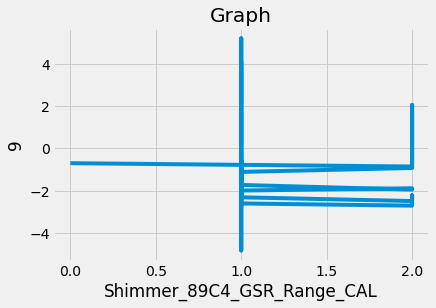

In [112]:
# makeGraphWCols('Shimmer_89C4_GSR_Range_CAL', '9')
ShimmerData['Shimmer_89C4_GSR_Range_CAL'] = ShimmerData['Shimmer_89C4_GSR_Range_CAL'].astype(float)
MAINDATA['9'] = MAINDATA['9'].astype(float)

# Plotting the graph
plt.plot(ShimmerData['Shimmer_89C4_GSR_Range_CAL'], MAINDATA['9'])

# Adding labels and title
plt.xlabel('Shimmer_89C4_GSR_Range_CAL')
plt.ylabel('9')
plt.title('Graph')

# Display the graph
plt.show()

In [113]:
ShimmerData.dropna()

,Shimmer_89C4_Timestamp_Unix_CAL,Shimmer_89C4_Accel_LN_X_CAL,Shimmer_89C4_Accel_LN_Y_CAL,Shimmer_89C4_Accel_LN_Z_CAL,Shimmer_89C4_Accel_WR_X_CAL,Shimmer_89C4_Accel_WR_Y_CAL,Shimmer_89C4_Accel_WR_Z_CAL,Shimmer_89C4_GSR_Range_CAL,Shimmer_89C4_GSR_Skin_Conductance_CAL,Shimmer_89C4_GSR_Skin_Resistance_CAL,Shimmer_89C4_Gyro_X_CAL,Shimmer_89C4_Gyro_Y_CAL,Shimmer_89C4_Gyro_Z_CAL,Shimmer_89C4_Mag_X_CAL,Shimmer_89C4_Mag_Y_CAL,Shimmer_89C4_Mag_Z_CAL
0,1.583260e+09,-2.402173913043478,-0.8913043478260869,9.25,-5.357271095152603,-3.6481149012567324,7.861160981448235,0.0,2.5331219361070128,394.76978417266156,-0.0916030534351145,1.0381679389312977,-0.3969465648854962,0.2563718140929535,0.035982008995502246,0.15292353823088456
1,1.583260e+09,-1.9456521739130435,-0.8369565217391304,9.141304347826086,-4.85936564931179,-3.6074207061639734,7.727109515260323,2.0,2.438827838827839,410.0330429558426,0.47328244274809156,-0.41221374045801523,-2.687022900763359,0.2518740629685157,0.04047976011994003,0.14842578710644677
2,1.583260e+09,-2.119565217391304,-0.8695652173913043,9.619565217391305,-5.036505086774387,-3.6169958108916815,8.24655894673848,2.0,2.4256410256410255,412.262156448203,-1.2366412213740459,-11.603053435114504,0.8244274809160305,0.2563718140929535,0.041979010494752625,0.15292353823088456
3,1.583260e+09,-2.0978260869565215,-0.8260869565217391,9.032608695652174,-5.005385996409336,-3.576301615798923,7.626570915619389,2.0,2.405128205128205,415.77825159914715,-0.8396946564885496,5.374045801526718,2.610687022900763,0.2593703148425787,0.05697151424287856,0.14992503748125938
4,1.583260e+09,-2.380434782608696,-0.8369565217391304,9.358695652173912,-5.333333333333333,-3.595451825254339,7.961699581089168,2.0,2.383150183150183,419.61266523209343,2.0610687022900764,3.1755725190839694,0.48854961832061067,0.25037481259370314,0.04947526236881559,0.14692653673163417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,1.583261e+09,-6.478261,4.413043,0.173913,-10.099342,2.274087,-1.840814,1.0,6.067568,164.810686,25.044847,-44.605677,7.550095,0.34033,-0.005997,0.397301
1174,1.583261e+09,-5.380435,5.304348,8.097826,-8.81149,3.29623,6.685817,1.0,6.394303,156.389222,27.289122,82.539361,36.786737,0.173913,-0.008996,0.001499
1175,1.583261e+09,3.271739,8.836957,5.630435,0.696589,7.351287,3.964093,1.0,5.689781,175.753701,-11.794847,-116.773616,14.771469,-0.052474,-0.398801,0.052474
1176,1.583261e+09,4.086957,8.75,7.717391,1.649312,7.265111,6.372232,1.0,5.766359,173.419655,-5.657443,-4.758349,3.870706,-0.103448,-0.343328,0.022489


In [114]:
x[0] = 0

In [115]:
max(x)

TypeError: '>' not supported between instances of 'list' and 'int'

In [116]:
min(x)

TypeError: '<' not supported between instances of 'list' and 'int'

C:\Users\Viraj\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


ValueError: setting an array element with a sequence.

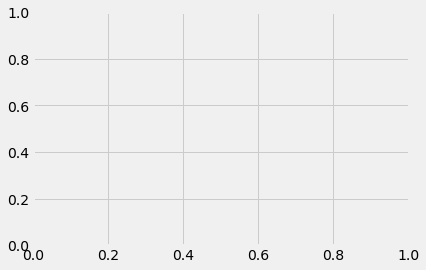

In [117]:
plt.plot(x)
plt.show()

In [118]:
MAINDATA

,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,33
0,1.583260e+09,-6.780594,0.282685,-6.498009,-7.063249,0.748996,1.442933,2.191829,-0.693907,-3.919300,...,-0.542433,-1.641266,-2.628136,-2.571825,-5.199961,-0.056331,-1.539516,0.052994,-1.486421,-1.592480
1,1.583260e+09,-6.876689,0.281064,-6.595725,-7.157723,0.601966,1.452193,2.054059,-0.850197,-3.986562,...,-0.795528,-1.862870,-2.820325,-2.575068,-5.395393,-0.245278,-1.689412,0.020579,-1.668732,-1.709961
2,1.583260e+09,-6.950681,0.278748,-6.672034,-7.229399,0.543345,1.458675,2.001921,-0.915300,-4.090343,...,-1.029978,-2.045454,-2.976952,-2.597990,-5.574942,-0.378982,-1.853724,-0.006742,-1.860366,-1.846952
3,1.583260e+09,-6.868047,0.299354,-6.568793,-7.167372,0.648081,1.478587,2.126569,-0.830476,-4.135503,...,-0.911890,-1.996363,-2.968311,-2.579699,-5.548010,-0.388631,-1.816250,0.001362,-1.814788,-1.817582
4,1.583260e+09,-6.909386,0.342418,-6.567068,-7.251773,0.646128,1.557538,2.203567,-0.911380,-4.250833,...,-1.233007,-2.338312,-3.175872,-2.591741,-5.767613,-0.584151,-2.038228,-0.005586,-2.043714,-2.032612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,1.583261e+09,-12.602237,-13.831956,-26.434292,1.229749,4.254158,0.019531,4.273589,4.234658,-7.947717,...,1.050399,2.594173,2.957528,-1.656786,1.300742,4.614294,4.463071,-1.128674,3.334497,5.591775
1174,1.583261e+09,-12.709882,-13.786809,-26.496790,1.076957,3.893835,-0.066600,3.827135,3.960465,-8.187932,...,0.501740,2.326132,2.713449,-1.663039,1.050409,4.376468,4.067226,-1.301859,2.765467,5.369116
1175,1.583261e+09,-12.624339,-13.831261,-26.455700,1.206952,4.596202,0.161923,4.758024,4.434309,-7.554739,...,1.686414,2.868999,2.949842,-1.661185,1.288658,4.611007,4.534197,-1.168033,3.366264,5.702261
1176,1.583261e+09,-13.257533,-14.020192,-27.277826,0.762689,4.327153,0.114689,4.441742,4.212494,-7.450045,...,3.989114,2.935127,1.983289,-2.080951,-0.097663,4.064220,4.818575,-1.005267,3.813408,5.823873


In [119]:
ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL']

0       1.583260e+09
1       1.583260e+09
2       1.583260e+09
3       1.583260e+09
4       1.583260e+09
            ...     
1173    1.583261e+09
1174    1.583261e+09
1175    1.583261e+09
1176    1.583261e+09
1177    1.583261e+09
Name: Shimmer_89C4_Timestamp_Unix_CAL, Length: 1178, dtype: float64

In [120]:
MAINDATA['1'][1176]

1583261072.0

In [121]:
ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL'][0]

1583259896.0

In [122]:
ShimmerDataa = pd.read_csv('1058_Shimmer1.csv')
ShimmerDataa

C:\Users\Viraj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Shimmer_89C4_Timestamp_Unix_CAL,Shimmer_89C4_Accel_LN_X_CAL,Shimmer_89C4_Accel_LN_Y_CAL,Shimmer_89C4_Accel_LN_Z_CAL,Shimmer_89C4_Accel_WR_X_CAL,Shimmer_89C4_Accel_WR_Y_CAL,Shimmer_89C4_Accel_WR_Z_CAL,Shimmer_89C4_GSR_Range_CAL,Shimmer_89C4_GSR_Skin_Conductance_CAL,Shimmer_89C4_GSR_Skin_Resistance_CAL,Shimmer_89C4_Gyro_X_CAL,Shimmer_89C4_Gyro_Y_CAL,Shimmer_89C4_Gyro_Z_CAL,Shimmer_89C4_Mag_X_CAL,Shimmer_89C4_Mag_Y_CAL,Shimmer_89C4_Mag_Z_CAL,Unnamed: 16
0,ms,m/(s^2),m/(s^2),m/(s^2),m/(s^2),m/(s^2),m/(s^2),no_units,uS,kOhms,deg/s,deg/s,deg/s,local_flux,local_flux,local_flux,NaN
1,1.5832598958057556E12,-2.402173913043478,-0.8913043478260869,9.25,-5.357271095152603,-3.6481149012567324,7.861160981448235,0.0,2.5331219361070128,394.76978417266156,-0.0916030534351145,1.0381679389312977,-0.3969465648854962,0.2563718140929535,0.035982008995502246,0.15292353823088456,NaN
2,1.583259895813568E12,-2.369565217391304,-0.9021739130434783,9.25,-5.326152004787552,-3.6361460203470974,7.889886295631358,0.0,2.5331219361070128,394.76978417266156,0.4580152671755725,1.1450381679389312,-0.16793893129770993,0.2638680659670165,0.04497751124437781,0.15592203898050974,NaN
3,1.5832598958213806E12,-2.391304347826087,-0.9021739130434783,9.25,-5.333333333333333,-3.6433273488928783,7.889886295631358,0.0,2.5331219361070128,394.76978417266156,0.3053435114503817,1.4961832061068703,-0.4427480916030534,0.24887556221889054,0.038980509745127435,0.15892053973013492,NaN
4,1.583259895829193E12,-2.402173913043478,-0.9130434782608695,9.25,-5.350089766606822,-3.6648713345302215,7.877917414721724,0.0,2.5331219361070128,394.76978417266156,0.549618320610687,1.5572519083969465,-0.366412213740458,0.2578710644677661,0.046476761619190406,0.15442278860569714,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151194,1583261077282.318115,8.413043,8.48913,3.673913,6.386595,7.032914,1.910233,1.0,6.644459,150.501345,20.754771,8.234017,17.565363,-0.17991,-0.376312,0.310345,NaN
151195,1583261077290.130615,8.467391,8.5,3.434783,6.441652,7.049671,1.752244,1.0,6.644459,150.501345,21.014313,5.165315,19.641698,-0.182909,-0.383808,0.313343,NaN
151196,1583261077297.943115,8.445652,8.521739,3.369565,6.470377,7.056852,1.62298,1.0,6.644459,150.501345,20.067748,0.157681,19.382156,-0.184408,-0.37931,0.32084,NaN
151197,1583261077305.755615,8.597826,8.445652,3.402174,6.563734,7.01137,1.630162,1.0,6.644459,150.501345,16.800573,-3.872853,19.214218,-0.191904,-0.385307,0.317841,NaN


In [123]:
MAINDATA = pd.read_csv('Participant_1058 (B).csv')
MAINDATAunixStart = 1583259855

MAINDATA['1'] = (MAINDATA['1']/50)+MAINDATAunixStart


drop_cols = ['Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54',
       'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58',
       'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', '34']
MAINDATA = MAINDATA[MAINDATA['1'] > 1583260424]
MAINDATA

C:\Users\Viraj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: DtypeWarning: Columns (60) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,1,2,3,4,5,6,7,8,9,10,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
28451,1.583260e+09,-15.472253,-12.298573,-27.770926,-3.173649,0.007244,1.178523,1.185667,-1.171249,-13.007509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28452,1.583260e+09,-15.442464,-12.294868,-27.737433,-3.147566,0.066820,1.185932,1.252652,-1.119082,-12.955619,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28453,1.583260e+09,-15.390574,-12.291858,-27.682531,-3.098686,0.119666,1.202834,1.322400,-1.083139,-12.896043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28454,1.583260e+09,-15.345414,-12.279355,-27.624868,-3.066029,0.193658,1.205150,1.398709,-1.011462,-12.828781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28455,1.583260e+09,-15.301209,-12.280744,-27.582054,-3.020436,0.238818,1.217653,1.456371,-0.978805,-12.776891,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60905,1.583261e+09,-12.984663,-13.917392,-26.902155,0.932759,3.786232,-0.128187,3.657945,3.914449,-7.387644,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60906,1.583261e+09,-12.940458,-13.918781,-26.859339,0.978352,3.793918,-0.123788,3.670030,3.917736,-7.364586,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60907,1.583261e+09,-12.895299,-13.906278,-26.801676,1.011009,3.845808,-0.120778,3.724931,3.966616,-7.305010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60908,1.583261e+09,-12.821306,-13.903962,-26.725368,1.082686,3.897699,-0.117768,3.779831,4.015496,-7.237748,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
def MainPipeline(MAINDATA, ShimmerData, MAINDATAunixStart):
    MAINDATA = MAINDATA.copy()
    ShimmerData = ShimmerData.copy()    
    
    MAINDATA['1'] = (MAINDATA['1']/50)+MAINDATAunixStart

    MAINDATA['1'] = MAINDATA['1'].round()
    MAINDATA = MAINDATA.drop_duplicates('1', keep="first")

#     drop_cols = ['Unnamed: 34',
#            'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
#            'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
#            'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
#            'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
#            'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54',
#            'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58',
#            'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', '34']
#     MAINDATA = MAINDATA.drop(drop_cols, axis=1)
    # MAINDATA = MAINDATA[MAINDATA['1'] > 1583260424]
    
    columns_to_drop = MAINDATA.filter(like='Unnamed').columns

# Drop the filtered columns
    MAINDATA.drop(columns=columns_to_drop, inplace=True)
    MAINDATA.drop(columns='34', inplace=True, errors='ignore')

#     MAINDATA.drop(columns='34', inplace=True)


    ShimmerData = ShimmerData.drop(0)
    ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL']

    ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL'] = ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL'].apply(lambda x: '{:.0f}'.format(float(x)) if isinstance(x, str) else x)

    ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL'] = pd.to_numeric(ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL'])

    ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL'] /= 1000

    ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL'][1]


    ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL'] = ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL'].round()
    ShimmerData = ShimmerData.drop_duplicates('Shimmer_89C4_Timestamp_Unix_CAL', keep="first")
    
    ShimmerData.drop(columns=ShimmerData.columns[-1], inplace=True, errors='ignore')

#     drop_cols = ['Unnamed: 16']
#     ShimmerData = ShimmerData.drop(drop_cols, axis=1)

    ShimmerData
    unique_timestamps = MAINDATA['1'].unique()

    # Filter 'ShimmerData' to include rows with matching timestamps
    ShimmerData = ShimmerData[ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL'].isin(unique_timestamps)]

    unique_timestamps = ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL'].unique()

    # Filter 'MAINDATA' to include rows with matching timestamps
    MAINDATA = MAINDATA[MAINDATA['1'].isin(unique_timestamps)]
    ShimmerData = ShimmerData.reset_index(drop=True)
    MAINDATA = MAINDATA.reset_index(drop=True)
    x = runThroughDfForRVal(ShimmerData, MAINDATA, 'r')
    return x

In [125]:
def MainPipelineWEnd(MAINDATA, ShimmerData, MAINDATAunixStart, end_unix_timestamp, p):
    MAINDATA = MAINDATA.copy()
    ShimmerData = ShimmerData.copy()    
    
    MAINDATA['1'] = (MAINDATA['1'] / 50) + MAINDATAunixStart

    MAINDATA['1'] = MAINDATA['1'].round()
    MAINDATA = MAINDATA.drop_duplicates('1', keep="first")

    columns_to_drop = MAINDATA.filter(like='Unnamed').columns
    MAINDATA.drop(columns=columns_to_drop, inplace=True)
    MAINDATA.drop(columns='34', inplace=True, errors='ignore')

    ShimmerData = ShimmerData.drop(0)
    ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL']

    ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL'] = ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL'].apply(lambda x: '{:.0f}'.format(float(x)) if isinstance(x, str) else x)
    ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL'] = pd.to_numeric(ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL'])
    ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL'] /= 1000
    ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL'] = ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL'].round()
    ShimmerData = ShimmerData.drop_duplicates('Shimmer_89C4_Timestamp_Unix_CAL', keep="first")
    ShimmerData.drop(columns=ShimmerData.columns[-1], inplace=True, errors='ignore')

    unique_timestamps = MAINDATA['1'].unique()

    # Filter 'ShimmerData' to include rows with timestamps within the specified range
    ShimmerData = ShimmerData[
        (ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL'] >= MAINDATAunixStart) &
        (ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL'] <= end_unix_timestamp)
    ]

    unique_timestamps = ShimmerData['Shimmer_89C4_Timestamp_Unix_CAL'].unique()

    # Filter 'MAINDATA' to include rows with timestamps within the specified range
    MAINDATA = MAINDATA[MAINDATA['1'].isin(unique_timestamps)]
    ShimmerData = ShimmerData.reset_index(drop=True)
    MAINDATA = MAINDATA.reset_index(drop=True)
    x = runThroughDfForRVal(ShimmerData, MAINDATA, p)
    return x

In [126]:
z = MainPipeline(MAINDATAog, ShimmerDataog, MAINDATAunixStartog)
z[1]

('Shimmer_89C4_GSR_Range_CAL', ' and ', '3')
Correlation coefficient (r-value): 0.893380761139
('Shimmer_89C4_GSR_Range_CAL', ' and ', '4')
Correlation coefficient (r-value): 0.899544256561
('Shimmer_89C4_GSR_Range_CAL', ' and ', '11')
Correlation coefficient (r-value): 0.898110945032
('Shimmer_89C4_GSR_Range_CAL', ' and ', '12')
Correlation coefficient (r-value): 0.898106330031
('Shimmer_89C4_GSR_Range_CAL', ' and ', '19')
Correlation coefficient (r-value): 0.892684984186
('Shimmer_89C4_GSR_Range_CAL', ' and ', '20')
Correlation coefficient (r-value): 0.896050252289
('Shimmer_89C4_GSR_Skin_Conductance_CAL', ' and ', '3')
Correlation coefficient (r-value): -0.90675785717
('Shimmer_89C4_GSR_Skin_Conductance_CAL', ' and ', '11')
Correlation coefficient (r-value): -0.91022508426
('Shimmer_89C4_GSR_Skin_Conductance_CAL', ' and ', '19')
Correlation coefficient (r-value): -0.905802572373
('Shimmer_89C4_GSR_Skin_Resistance_CAL', ' and ', '3')
Correlation coefficient (r-value): 0.905376932225


[('Shimmer_89C4_Accel_LN_X_CAL', ' and ', '2'),
 ('Shimmer_89C4_Accel_LN_X_CAL', ' and ', '3'),
 ('Shimmer_89C4_Accel_LN_X_CAL', ' and ', '4'),
 ('Shimmer_89C4_Accel_LN_X_CAL', ' and ', '5'),
 ('Shimmer_89C4_Accel_LN_X_CAL', ' and ', '6'),
 ('Shimmer_89C4_Accel_LN_X_CAL', ' and ', '7'),
 ('Shimmer_89C4_Accel_LN_X_CAL', ' and ', '8'),
 ('Shimmer_89C4_Accel_LN_X_CAL', ' and ', '9'),
 ('Shimmer_89C4_Accel_LN_X_CAL', ' and ', '10'),
 ('Shimmer_89C4_Accel_LN_X_CAL', ' and ', '11'),
 ('Shimmer_89C4_Accel_LN_X_CAL', ' and ', '12'),
 ('Shimmer_89C4_Accel_LN_X_CAL', ' and ', '13'),
 ('Shimmer_89C4_Accel_LN_X_CAL', ' and ', '14'),
 ('Shimmer_89C4_Accel_LN_X_CAL', ' and ', '15'),
 ('Shimmer_89C4_Accel_LN_X_CAL', ' and ', '16'),
 ('Shimmer_89C4_Accel_LN_X_CAL', ' and ', '17'),
 ('Shimmer_89C4_Accel_LN_X_CAL', ' and ', '18'),
 ('Shimmer_89C4_Accel_LN_X_CAL', ' and ', '19'),
 ('Shimmer_89C4_Accel_LN_X_CAL', ' and ', '20'),
 ('Shimmer_89C4_Accel_LN_X_CAL', ' and ', '21'),
 ('Shimmer_89C4_Accel_LN_X_C

In [127]:
thing1 = pd.read_csv('AllData/1056 fnirs.csv')
thing1

C:\Users\Viraj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: DtypeWarning: Columns (60,61) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,1,2,3,4,5,6,7,8,9,10,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
0,0,147.446167,84.391899,231.838074,63.054268,147.446167,84.391899,231.838074,63.054268,147.446167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,147.446167,84.391899,231.838074,63.054268,147.446167,84.391899,231.838074,63.054268,147.446167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,147.446167,84.391899,231.838074,63.054268,147.446167,84.391899,231.838074,63.054268,147.446167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,147.446167,84.391899,231.838074,63.054268,147.446167,84.391899,231.838074,63.054268,147.446167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,147.446167,84.391899,231.838074,63.054268,147.446167,84.391899,231.838074,63.054268,147.446167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68705,68705,59.839478,43.977909,103.817383,15.861569,49.689846,27.052492,76.742340,22.637354,45.987843,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68706,68706,59.748157,44.045746,103.793899,15.702414,49.660057,27.048788,76.708847,22.611271,45.959011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68707,68707,59.680897,44.033935,103.714828,15.646961,49.621628,27.026792,76.648422,22.594837,45.914806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68708,68708,59.613636,44.022129,103.635765,15.591507,49.554367,27.014984,76.569351,22.539383,45.877335,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# init dfs

In [128]:

MAINDATAlist = [pd.read_csv('AllData/1058 fnirs.csv'), pd.read_csv('AllData/1056 fnirs.csv'), pd.read_csv('AllData/793 fnirs.csv'), pd.read_csv('AllData/820 fnirs.csv'), pd.read_csv('AllData/877 fnirs.csv'), pd.read_csv('AllData/937 fnirs.csv'), pd.read_csv('AllData/942 fnirs.csv'), pd.read_csv('AllData/946 fnirs.csv'), pd.read_csv('AllData/961 fnirs.csv'), pd.read_csv('AllData/962 fnirs.csv'), pd.read_csv('AllData/963 fnirs.csv'), pd.read_csv('AllData/966 fnirs.csv'), pd.read_csv('AllData/984 fnirs.csv')]
SHIMMERlist = [pd.read_csv('AllData/Shimmer 1058.csv'), pd.read_csv('AllData/Shimmer 1056.csv'), pd.read_csv('AllData/Shimmer 793.csv'), pd.read_csv('AllData/Shimmer 820.csv'), pd.read_csv('AllData/Shimmer 877.csv'), pd.read_csv('AllData/Shimmer 937.csv'), pd.read_csv('AllData/Shimmer 942.csv'), pd.read_csv('AllData/Shimmer 946.csv'), pd.read_csv('AllData/Shimmer 961.csv'), pd.read_csv('AllData/Shimmer 962.csv'), pd.read_csv('AllData/Shimmer 963.csv'), pd.read_csv('AllData/Shimmer 966.csv'), pd.read_csv('AllData/Shimmer 984.csv')]
UNIXlist = [1583259855, 1583252859, 1581446269, 1578331780, 1579022591, 1580493577, 1581530217, 1583169839, 1581963551, 1582909766, 1582043831, 1583173779, 1582129540]

colstD = [0, 1, 2]
timestamps = pd.read_csv('timeStamps.csv')
timestamps.drop(colstD, inplace=True)
custom_order = [15, 14, 7, 4, 3, 5, 6, 12, 8, 11, 9, 13, 10]
co = [value - 3 for value in custom_order]
timestamps = timestamps.iloc[co]
timestamps


C:\Users\Viraj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: DtypeWarning: Columns (60) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Viraj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: DtypeWarning: Columns (60,61) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Viraj\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: DtypeWarning: Columns (33,60,61) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,A1- ECG baseline start,B1- ECG baseline end,C1- VR baseline start,D1- VR baseline end,E1- VR training start,F1- VR training end,G1- Food selection 1 (med-portion) start,H1- Food selection 1 (med-portion) end,I1- Food selection 2 (large-portion) start,J1- Food selection 2 (large-portion) end
15,1058,1.583260e+12,1.583260e+12,1.583260e+12,1.583260e+12,1.583261e+12,1.583261e+12,1.583261e+12,1.583261e+12,1.583261e+12,1.583261e+12
14,1056,1.583253e+12,1.583253e+12,1.583253e+12,1.583254e+12,1.583254e+12,1.583254e+12,1.583254e+12,1.583254e+12,1.583254e+12,1.583254e+12
7,793,1.581446e+12,1.581447e+12,1.581447e+12,1.581447e+12,1.581447e+12,1.581447e+12,1.581447e+12,1.581448e+12,1.581448e+12,1.581448e+12
4,820,1.578332e+12,1.578332e+12,1.578332e+12,1.578332e+12,1.578333e+12,1.578333e+12,1.578333e+12,1.578333e+12,1.578333e+12,1.578333e+12
3,877,1.579023e+12,1.579023e+12,1.579023e+12,1.579023e+12,1.579023e+12,1.579024e+12,1.579024e+12,1.579024e+12,1.579024e+12,1.579024e+12
5,937,1.580494e+12,1.580494e+12,1.580494e+12,1.580494e+12,1.580495e+12,1.580495e+12,1.580495e+12,1.580495e+12,1.580495e+12,1.580495e+12
6,942,1.581530e+12,1.581531e+12,1.581531e+12,1.581531e+12,1.581531e+12,1.581531e+12,1.581531e+12,1.581531e+12,1.581531e+12,1.581532e+12
12,946,1.583170e+12,1.583170e+12,1.583171e+12,1.583171e+12,1.583171e+12,1.583171e+12,1.583171e+12,1.583171e+12,1.583171e+12,1.583171e+12
8,961,1.581964e+12,1.581964e+12,1.581964e+12,1.581964e+12,1.581965e+12,1.581965e+12,1.581965e+12,1.581965e+12,1.581965e+12,1.581965e+12
11,962,1.582910e+12,1.582910e+12,1.582910e+12,1.582911e+12,1.582911e+12,1.582911e+12,1.582911e+12,1.582911e+12,1.582911e+12,1.582911e+12


In [129]:
# z = timestamps.iloc[:, 2].to_list()
# z
timestamps.columns
# ctd = ['B1- ECG baseline end', 'D1- VR baseline end', 'H1- Food selection 1 (med-portion) end', 'J1- Food selection 2 (large-portion) end']
# df.drop(, axis=1, inplace=True)

Index(['ID', 'A1- ECG baseline start', 'B1- ECG baseline end',
       'C1-  VR baseline start', 'D1- VR baseline end',
       'E1- VR training start', 'F1- VR training end',
       'G1- Food selection 1 (med-portion) start',
       'H1- Food selection 1 (med-portion) end',
       'I1- Food selection 2 (large-portion) start',
       'J1- Food selection 2 (large-portion) end'],
      dtype='object')

In [130]:
AllResults = []

for i in range(13):
    print(i)
    AllResults.append(MainPipeline(MAINDATAlist[i], SHIMMERlist[i], UNIXlist[i]))

0
(' Shimmer_89C4_GSR_Range_CAL', ' and ', '3')
Correlation coefficient (r-value): 0.893380761139
(' Shimmer_89C4_GSR_Range_CAL', ' and ', '4')
Correlation coefficient (r-value): 0.899544256561
(' Shimmer_89C4_GSR_Range_CAL', ' and ', '11')
Correlation coefficient (r-value): 0.898110945032
(' Shimmer_89C4_GSR_Range_CAL', ' and ', '12')
Correlation coefficient (r-value): 0.898106330031
(' Shimmer_89C4_GSR_Range_CAL', ' and ', '19')
Correlation coefficient (r-value): 0.892684984186
(' Shimmer_89C4_GSR_Range_CAL', ' and ', '20')
Correlation coefficient (r-value): 0.896050252289
(' Shimmer_89C4_GSR_Skin_Conductance_CAL', ' and ', '3')
Correlation coefficient (r-value): -0.90675785717
(' Shimmer_89C4_GSR_Skin_Conductance_CAL', ' and ', '11')
Correlation coefficient (r-value): -0.91022508426
(' Shimmer_89C4_GSR_Skin_Conductance_CAL', ' and ', '19')
Correlation coefficient (r-value): -0.905802572373
(' Shimmer_89C4_GSR_Skin_Resistance_CAL', ' and ', '3')
Correlation coefficient (r-value): 0.9

In [132]:
df = MAINDATAlist[3].copy()
columns_to_drop = df.filter(like='Unnamed').columns

# Drop the filtered columns
df.drop(columns=columns_to_drop, inplace=True)
df.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34'],
      dtype='object')

In [133]:
for i in range(13):
    print(SHIMMERlist[i].columns)

Index(['Shimmer_89C4_Timestamp_Unix_CAL', ' Shimmer_89C4_Accel_LN_X_CAL',
       ' Shimmer_89C4_Accel_LN_Y_CAL', ' Shimmer_89C4_Accel_LN_Z_CAL',
       ' Shimmer_89C4_Accel_WR_X_CAL', ' Shimmer_89C4_Accel_WR_Y_CAL',
       ' Shimmer_89C4_Accel_WR_Z_CAL', ' Shimmer_89C4_GSR_Range_CAL',
       ' Shimmer_89C4_GSR_Skin_Conductance_CAL',
       ' Shimmer_89C4_GSR_Skin_Resistance_CAL', ' Shimmer_89C4_Gyro_X_CAL',
       ' Shimmer_89C4_Gyro_Y_CAL', ' Shimmer_89C4_Gyro_Z_CAL',
       ' Shimmer_89C4_Mag_X_CAL', ' Shimmer_89C4_Mag_Y_CAL',
       ' Shimmer_89C4_Mag_Z_CAL', ' '],
      dtype='object')
Index(['Shimmer_89C4_Timestamp_Unix_CAL', ' Shimmer_89C4_Accel_LN_X_CAL',
       ' Shimmer_89C4_Accel_LN_Y_CAL', ' Shimmer_89C4_Accel_LN_Z_CAL',
       ' Shimmer_89C4_Accel_WR_X_CAL', ' Shimmer_89C4_Accel_WR_Y_CAL',
       ' Shimmer_89C4_Accel_WR_Z_CAL', ' Shimmer_89C4_GSR_Range_CAL',
       ' Shimmer_89C4_GSR_Skin_Conductance_CAL',
       ' Shimmer_89C4_GSR_Skin_Resistance_CAL', ' Shimmer_89C4_Gyro_

In [134]:
average =[]
for i in range(len(AllResults[4][0])):
    sum = 0
    for j in range(13):
        sum += AllResults[j][0][i]
    average.append(sum/13)

In [135]:
max(average)

min(average)
    

-0.31580551989827793

In [136]:
AllResults[0][1][477]

(' Shimmer_89C4_Mag_Z_CAL', ' and ', '31')

In [137]:
iop = []
for i in range(13):
    print(AllResults[i][0][250])
    iop.append(AllResults[i][0][250])

0.70518362706
0.568380079068
0.522377013859
0.748597896055
0.713478984985
-0.455145014412
-0.423477985864
0.699331553628
-0.593960007695
0.275683784114
0.307250922345
0.777508477419
0.662210951612


In [138]:
np.sum(iop)/13

0.34672463709034723

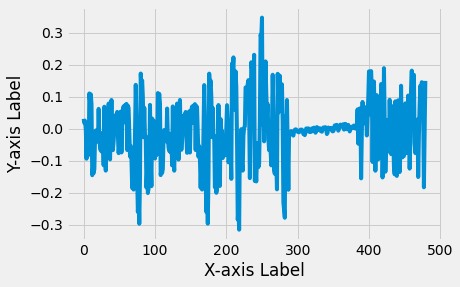

In [139]:
data = average

# Create an array of x-values for the plot
x_values = np.arange(len(data))

# Plot the data
plt.plot(x_values, data)

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
# plt.title('Plot with 480 Points')

# Display the plot
plt.show()

In [140]:
for i in range(len(AllResults[0][0])):
    print(AllResults[0][1][i])
    print(average[i])

(' Shimmer_89C4_Accel_LN_X_CAL', ' and ', '2')
0.030566843665
(' Shimmer_89C4_Accel_LN_X_CAL', ' and ', '3')
0.0173379902225
(' Shimmer_89C4_Accel_LN_X_CAL', ' and ', '4')
0.0239581341382
(' Shimmer_89C4_Accel_LN_X_CAL', ' and ', '5')
-0.00413276103557
(' Shimmer_89C4_Accel_LN_X_CAL', ' and ', '6')
-0.0940589908015
(' Shimmer_89C4_Accel_LN_X_CAL', ' and ', '7')
0.000228566475015
(' Shimmer_89C4_Accel_LN_X_CAL', ' and ', '8')
-0.0844709172813
(' Shimmer_89C4_Accel_LN_X_CAL', ' and ', '9')
-0.0738340705554
(' Shimmer_89C4_Accel_LN_X_CAL', ' and ', '10')
0.109798576035
(' Shimmer_89C4_Accel_LN_X_CAL', ' and ', '11')
0.08232154532
(' Shimmer_89C4_Accel_LN_X_CAL', ' and ', '12')
0.107215473045
(' Shimmer_89C4_Accel_LN_X_CAL', ' and ', '13')
0.0769608429471
(' Shimmer_89C4_Accel_LN_X_CAL', ' and ', '14')
-0.145578737932
(' Shimmer_89C4_Accel_LN_X_CAL', ' and ', '15')
-0.12459113948
(' Shimmer_89C4_Accel_LN_X_CAL', ' and ', '16')
-0.13917730112
(' Shimmer_89C4_Accel_LN_X_CAL', ' and ', '17')


In [141]:
AllResults[0][0][1]


def remove_outliers_iqr(data_array):
    data_array = np.array(data_array)  # Convert to NumPy array
    q1 = np.percentile(data_array, 25)
    q3 = np.percentile(data_array, 75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    filtered_data = data_array[(data_array >= lower_bound) & (data_array <= upper_bound)]

    return filtered_data


In [142]:
AverageTrue = []

for i in range(480):
    blank = []
    AverageTrue.append(blank)

for i in range(480):
    for j in range(13):
        AverageTrue[i].append(AllResults[j][0][i])

In [143]:
for i in range(480):
#     if(i == 250):
#         print(AverageTrue[i])
#     AverageTrue[i] = remove_outliers_iqr(AverageTrue[i])
#     if(i == 250):
#         print(AverageTrue[i])
    AverageTrue[i] = np.mean(AverageTrue[i])
    

In [144]:
max(AverageTrue)
min(AverageTrue)


-0.31580551989827793

In [145]:
average[123]

-0.028935229172455286

In [146]:
tempMax = 0
tempMaxI = 0
tempMin = 0
tempMinI = 0

for i in range(len(AverageTrue)):
    if(AverageTrue[i] > tempMax):
        tempMax = AverageTrue[i]
        tempMaxI = i
    if(AverageTrue[i]<tempMin):
        tempMin = AverageTrue[i]
        tempMinI = i
        
        
print(tempMaxI)
print(tempMax)
print(tempMinI)
print(tempMin)

250
0.34672463709
218
-0.315805519898


In [147]:
print(AllResults[1][1][250])

print("Since 28 essentially is total hemoglobin, the interpretation of this is that skin conductance matches total hemoglobin as seen through the brain in fNIRS, ")

(' Shimmer_89C4_GSR_Skin_Conductance_CAL', ' and ', '28')
Since 28 essentially is total hemoglobin, the interpretation of this is that skin conductance matches total hemoglobin as seen through the brain in fNIRS, 


In [148]:
c = np.sort(AverageTrue)
c

array([ -3.15805520e-01,  -2.97239548e-01,  -2.97028549e-01,
        -2.84229617e-01,  -2.78558557e-01,  -2.60773113e-01,
        -2.60427092e-01,  -2.54613962e-01,  -2.53690021e-01,
        -2.30588614e-01,  -2.01305265e-01,  -2.00548508e-01,
        -1.95971669e-01,  -1.95826507e-01,  -1.91072493e-01,
        -1.90487385e-01,  -1.90326925e-01,  -1.89808981e-01,
        -1.87155340e-01,  -1.86879294e-01,  -1.85359608e-01,
        -1.84815282e-01,  -1.84183011e-01,  -1.83500897e-01,
        -1.83412721e-01,  -1.79809749e-01,  -1.79153014e-01,
        -1.65070564e-01,  -1.63748586e-01,  -1.59898854e-01,
        -1.59118312e-01,  -1.56986765e-01,  -1.55455136e-01,
        -1.54746597e-01,  -1.53428590e-01,  -1.53380858e-01,
        -1.53026695e-01,  -1.52690843e-01,  -1.52532243e-01,
        -1.51265429e-01,  -1.47816250e-01,  -1.45578738e-01,
        -1.45269977e-01,  -1.44063772e-01,  -1.43277174e-01,
        -1.42915533e-01,  -1.41112934e-01,  -1.39177301e-01,
        -1.38729556e-01,

In [ ]:
AllResults[0][0]

In [ ]:
xcv = []
for i in range(13):
    xcv.append(AllResults[i][0][250])
    print(AllResults[i][0][250])

In [ ]:
print(sum(xcv)/len(xcv))

In [ ]:
plotData = np.sort(xcv)

In [ ]:
data = plotData

# Create an array of x-values for the plot
x_values = np.arange(len(data))

# Plot the data
plt.plot(x_values, data)

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
# plt.title('Plot with 480 Points')

# Display the plot
plt.show()

In [ ]:
colstD = [0, 1, 2]
timestamps = pd.read_csv('timeStamps.csv')
timestamps.drop(colstD, inplace=True)
timestamps

# by phases

In [ ]:
def postPipelineProcess(MAINDATAlist, SHIMMERlist, UNIXlist, ENDUNIXLIST, p):
    AllResults = []
    for i in range(13):
#         print(i)
        AllResults.append(MainPipelineWEnd(MAINDATAlist[i], SHIMMERlist[i], UNIXlist[i], ENDUNIXLIST[i], p))
    average =[]
    for i in range(len(AllResults[4][0])):
        sum = 0
        for j in range(13):
            sum += AllResults[j][0][i]
        average.append(sum/13)
    return [average, AllResults]

In [ ]:
def getMaxMin(AverageTrue):
    tempMax = 0
    tempMaxI = 0
    tempMin = 0
    tempMinI = 0
    for i in range(len(AverageTrue)):
        if(AverageTrue[i] > tempMax):
            tempMax = AverageTrue[i]
            tempMaxI = i
        if(AverageTrue[i]<tempMin):
            tempMin = AverageTrue[i]
            tempMinI = i

    print("MAX: ")
    print(AllResults[1][1][tempMaxI])
    print(tempMax)
    print("MIN: ")
    print(AllResults[1][1][tempMinI])
    print(tempMin)

R Val

In [ ]:
result_list = []

for i in range(1, timestamps.shape[1], 2):
    print(i)
    temp = timestamps.iloc[:, i].to_list()
    temp = [value / 1000 for value in temp]
    temp2 = timestamps.iloc[:, i+1].to_list()
    temp2 = [value / 1000 for value in temp2]
    result_list.append(postPipelineProcess(MAINDATAlist, SHIMMERlist, temp, temp2, 'z'))
#     print(result_list)

In [ ]:
# timestamps.columns

In [ ]:
# MainPipeline(MAINDATAlist[0], SHIMMERlist[0], (timestamps.iloc[:, 3].to_list()[0])/1000)

In [ ]:
# for i in range(timestamps.shape[1]):
#     y = timestamps.iloc[:, i].to_list()[0]
#     f = UNIXlist[0]
#     if(y/1000>f):
#         print(y)
#     if(i == 0):
#         print(y)

In [ ]:
# UNIXlist[0]

In [ ]:
# timestamps.iloc[:, 11].to_list()[3]/1000

In [ ]:
# len(timestamps)

In [ ]:
# for i in range(len(timestamps)):
#     print(timestamps.iloc[:, 0].to_list()[i])

# result_list key
result_list = [AVERAGE LIST, ALLRESULT LIST] = [phase][average/AllResults][correlation]

Allresult list = [participant, 1/0 = label/number, correlation] = [participant][0/1 = number/label][correlation]

In [ ]:
AllResults[0][1][250]

In [ ]:
SCCRList = []

for i in range(len(result_list)):
    getMaxMin(result_list[i][0])

    SCCRList.append(result_list[i][0][250])
    print(AllResults[i][1][250])
    print(result_list[i][0][250])

In [ ]:
result_list

In [ ]:
SCCRList

In [ ]:
 x_values = range(len(SCCRList))

plt.figure(figsize=(10, 6))
plt.scatter(x_values, SCCRList, label='Skin Conductance R across Phases')
plt.xlabel("Phases")
plt.ylabel('Values')
plt.title('List Plot with X-axis Legend')
x_axis_labels = timestamps.columns.to_list()
x_axis_labels
plt.xticks(x_values)  # Set custom tick labels on the x-axis
plt.grid(True)
plt.show()
for i in range(1, len(x_axis_labels), 2):
    print((i-1)/2, " -",((i-1)/2)+1,  "= ", x_axis_labels[i])

In [ ]:
SCCRListThirteen = []

for i in range(13):
    temp = []
    SCCRListThirteen.append(temp)

for i in range(len(result_list)):
#     getMaxMin(result_list[i][0])
    for j in range((13)):
        SCCRListThirteen[j].append(result_list[i][1][j][0][250])

#     SCCRListThirteen.append(result_list[i][0][250])
    print(AllResults[i][1][250])
    print(result_list[i][0][250])
#     print(SCCRListThirteen)


In [ ]:
len(SCCRListThirteen[0])

In [ ]:
x_values = [0, 1, 2, 3, 4]


plt.figure(figsize=(10, 6))

SCCRListThirteenLabels = ['1058', '1056', '793', '820', '877', '937', '942', '946', '961', '962', '963', '966', '984']


for i in range(len(SCCRListThirteen)):
    plt.plot(SCCRListThirteen[i], label=SCCRListThirteenLabels[i])
plt.xlabel("Phases")
plt.ylabel('Values')
plt.legend(SCCRListThirteenLabels, title='prtn', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.title('List Plot with X-axis Legend')
x_axis_labels = timestamps.columns.to_list()
x_axis_labels
plt.xticks(x_values)  # Set custom tick labels on the x-axis
plt.grid(True)
plt.show()
for i in range(1, len(x_axis_labels), 2):
    print((i-1)/2, "= ", x_axis_labels[i][:-5])

In [ ]:
x_values = [0, 1, 2, 3, 4]

plt.figure(figsize=(10, 6))

SCCRListThirteenLabels = ['1058', '1056', '793', '820', '877', '937', '942', '946', '961', '962', '963', '966', '984']

# Calculate percentage changes for each dataset
percentage_changes = []
for i in range(1, len(SCCRListThirteen)):
    current_data = SCCRListThirteen[i]
    previous_data = SCCRListThirteen[i-1]
    
    # Calculate percentage changes for each element in the lists
    changes = [((current - previous) / previous) * 100 for current, previous in zip(current_data, previous_data)]
    percentage_changes.append(changes)

# Plotting the percentage changes
for i in range(len(percentage_changes)):
    plt.plot(percentage_changes[i], label=SCCRListThirteenLabels[i])

plt.xlabel("Phases")
plt.ylabel('Percentage Change')
plt.legend(SCCRListThirteenLabels, title='prtn', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.title('Percentage Change Plot with X-axis Legend')
x_axis_labels = timestamps.columns.to_list()
plt.xticks(x_values)  # Set custom tick labels on the x-axis
plt.grid(True)
plt.show()

# Displaying phase names for x-axis
for i in range(1, len(x_axis_labels), 2):
    print((i-1)/2, "= ", x_axis_labels[i][:-5])


In [ ]:
pSCCRdf = pd.DataFrame(SCCRListThirteen)
pSCCRdf['ID'] = SCCRListThirteenLabels
pSCCRdf.rename(columns={0: 'ECG baseline ', 1: 'VR baseline', 2: 'VR training', 3: 'Food selection 1 (med-portion)', 4: 'Food selection 2 (large-portion)'}, inplace=True)

last_col = pSCCRdf.pop(pSCCRdf.columns[-1])
pd.options.display.float_format = '{:.6f}'.format
pSCCRdf.insert(0, last_col.name, last_col)

pSCCRdf = pSCCRdf.apply(pd.to_numeric, errors='coerce')

def highlight_below_threshold(val):
    if(val>0):
        return 'background-color: green'
    if(val<0):
        return 'background-color: red'
    return ''
pSCCRdf_styled = pSCCRdf.style.applymap(highlight_below_threshold)


pSCCRdf_styled


P Val


In [ ]:
result_list_p = []

for i in range(1, timestamps.shape[1], 2):
    print(i)
    temp = timestamps.iloc[:, i].to_list()
    temp = [value / 1000 for value in temp]
    temp2 = timestamps.iloc[:, i+1].to_list()
    temp2 = [value / 1000 for value in temp2]
    result_list_p.append(postPipelineProcess(MAINDATAlist, SHIMMERlist, temp, temp2, 'p'))
    print(result_list_p)

In [ ]:
SCCRListP = []

for i in range(len(result_list_p)):
    getMaxMin(result_list_p[i][0])

    SCCRListP.append(result_list_p[i][0][250])
    print(AllResults[i][1][250])
    print(result_list_p[i][0][250])

In [ ]:
 x_values = range(len(SCCRListP))

plt.figure(figsize=(10, 6))
plt.scatter(x_values, SCCRListP, label='Skin Conductance R across Phases')
plt.xlabel("Phases")
plt.ylabel('Values')
plt.title('List Plot with X-axis Legend')
x_axis_labels = timestamps.columns.to_list()
x_axis_labels
plt.xticks(x_values)  # Set custom tick labels on the x-axis
plt.grid(True)
plt.show()
for i in range(1, len(x_axis_labels), 2):
    print((i-1)/2, " -",((i-1)/2)+1,  "= ", x_axis_labels[i])
    


In [ ]:
SCCRListP

In [ ]:
SCCRListThirteenP = []

for i in range(13):
    temp = []
    SCCRListThirteenP.append(temp)

for i in range(len(result_list)):
#     getMaxMin(result_list[i][0])
    for j in range((13)):
        SCCRListThirteenP[j].append(result_list_p[i][1][j][0][250])

#     SCCRListThirteen.append(result_list[i][0][250])
    print(AllResults[i][1][250])
    print(result_list_p[i][0][250])
#     print(SCCRListThirteen)

In [ ]:
x_values = [0, 1, 2, 3, 4]


plt.figure(figsize=(10, 6))

SCCRListThirteenLabels = ['1058', '1056', '793', '820', '877', '937', '942', '946', '961', '962', '963', '966', '984']


for i in range(len(SCCRListThirteenP)):
    plt.plot(SCCRListThirteenP[i], label=SCCRListThirteenLabels[i])
plt.xlabel("Phases")
plt.ylabel('Values')
plt.legend(SCCRListThirteenLabels, title='prtn', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.title('List Plot with X-axis Legend')
x_axis_labels = timestamps.columns.to_list()
x_axis_labels
plt.xticks(x_values)  # Set custom tick labels on the x-axis
plt.grid(True)
plt.show()
for i in range(1, len(x_axis_labels), 2):
    print((i-1)/2, "= ", x_axis_labels[i][:-5])

In [ ]:
pSCCPdf = pd.DataFrame(SCCRListThirteenP)
pSCCPdf['ID'] = SCCRListThirteenLabels
pSCCPdf.rename(columns={0: 'ECG baseline', 1: 'VR baseline', 2: 'VR training', 3: 'Food selection 1 (med-portion)', 4: 'Food selection 2 (large-portion)'}, inplace=True)

last_col = pSCCPdf.pop(pSCCPdf.columns[-1])
pd.options.display.float_format = '{:.6f}'.format
pSCCPdf.insert(0, last_col.name, last_col)


pSCCPdf.style.apply(lambda _: np.where(
    pSCCRdf < 0,               # Compare DataFrames
    'background-color:red',  # True Styles
    ''                       # False Styles
), axis=None)

pSCCPdf.style.apply(lambda _: np.where(
    pSCCRdf > 0,               # Compare DataFrames
    'background-color:green',  # True Styles
    ''                       # False Styles
), axis=None)

In [ ]:
num_values_under_0_05 = (pSCCPdf < 0.05).sum().sum()

In [ ]:
pSCCRdf_styled

In [ ]:
pSCCRdf.to_csv('pSCCRdf.csv', index=False)
pSCCPdf.to_csv('pSCCPdf.csv', index=False)

In [ ]:

# def plot_time_series(df1, col1, df2, col2, timestamp_column, unix_timestamp):
#     unix_timestamps = df1[timestamp_column].to_list()
#     list1 = df1[col1].to_list()
#     list2 = df2[col2].to_list()
#     plt.figure(figsize=(10, 6))
#     plt.plot(unix_timestamps, list1, label=col1)
#     plt.plot(unix_timestamps, list2, label=col2)
#     plt.xlabel('Unix Timestamp')
#     plt.ylabel('Values')
#     plt.title('Time Series Plot')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# # Example usage:
# # Assuming you have two DataFrames df1 and df2, each containing a Unix timestamp column and other columns
# # Let's plot the columns 'value1' and 'value2' from df1 and df2, respectively, against the Unix timestamp 1627069750

# # plot_time_series(df1, 'value1', df2, 'value2', 'timestamp', 1627069750)


In [ ]:
# plot_time_series(MAINDATA, '28', ShimmerData, 'Shimmer_89C4_GSR_Skin_Conductance_CAL', '1', 1583259855)

In [ ]:
# ShimmerData.columns

In [ ]:
# MAINDATA.columns

In [ ]:
# MAINDATA

In [ ]:
import matplotlib.pyplot as plt

def plot_time_series(list1, list2, unix_timestamps):
    """
    Generate a time series plot for two different lists against a shared Unix timestamp.

    Parameters:
        list1 (list): First list of values to be plotted.
        list2 (list): Second list of values to be plotted.
        unix_timestamps (list): List of Unix timestamps corresponding to the values in list1 and list2.

    Returns:
        None (displays the plot).
    """
    # Convert Unix timestamps to pandas datetime objects (if needed)
    # Only necessary if you want the timestamps on the x-axis to be in a human-readable format
    # Skip this step if you prefer to keep Unix timestamps on the x-axis
    # timestamps = pd.to_datetime(unix_timestamps, unit='s')

    # Create the time series plot using matplotlib
    plt.figure(figsize=(10, 6))
    plt.plot(unix_timestamps, list1, label='List 1')
    plt.plot(unix_timestamps, list2, label='List 2')
    plt.xlabel('Unix Timestamp')
    plt.ylabel('Values')
    plt.title('Time Series Plot')
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
len(MAINDATA)

In [ ]:
len(ShimmerData)

# BY FOODBUFFET PHASES


In [ ]:
result_list_buffet = []
# initDFS()
for i in range(timestamps.shape[1]-6):
    print(i)
    temp = timestamps.iloc[:, i+6].to_list()
    temp = [value / 1000 for value in temp]
    result_list_buffet.append(postPipelineProcess(MAINDATAlist, SHIMMERlist, temp))

In [ ]:
for i in range(len(result_list_buffet)):
#     getMaxMin(result_list_buffet[i][0])
    print(AllResults[i][1][250])
    print(result_list_buffet[i][0][250])

In [ ]:
timestamps = pd.read_csv('timeStamps.csv')
timestamps

In [ ]:
z = postPipelineProcess(MAINDATAlist, SHIMMERlist, UNIXlist)

In [ ]:
getMaxMin(z[0])

In [ ]:
len(timestamps.columns)

In [ ]:
x = timestamps
x.pop(0)
x

In [ ]:
fgh = timestamps.iloc[0].to_list()
fgh = [value / 1000 for value in fgh]
fgh

In [ ]:
1583259855

In [ ]:
MAINDATA.iloc[-1]

In [ ]:
MainPipeline(MAINDATA, ShimmerData, MAINDATAunixStart)

In [ ]:
multivariate_analysis(MAINDATA, ShimmerData)

# Multivariate Analysis

In [ ]:
def multivariate_analysis(df1, df2):
    # Calculate the correlation coefficient and p-value for each pair of columns
    correlations = {}
    p_values = {}
    for col1 in df1.columns:
        for col2 in df2.columns:
            r, p = pearsonr(df1[col1], df2[col2])
            correlations[(col1, col2)] = r
            p_values[(col1, col2)] = p

    # Find the maximum absolute correlation and its corresponding p-value
    max_correlation = max(correlations, key=lambda key: abs(correlations[key]))
    big_r = correlations[max_correlation]
    p_value = p_values[max_correlation]

    return big_r, p_value

In [ ]:
multivariate_analysis(MAINDATA, ShimmerData)

In [ ]:
def run_cca(df1, df2):
    # Initialize CCA object
    cca = CCA(n_components=min(df1.shape[1], df2.shape[1]))

    # Fit the CCA model to the data
    cca.fit(df1, df2)

    # Transform the data using the CCA model
    cca_result_df1, cca_result_df2 = cca.transform(df1, df2)

    # Calculate the canonical correlation coefficients
    canonical_corr = cca.score(df1, df2)

    return cca_result_df1, cca_result_df2, canonical_corr

In [ ]:
multivariate_analysis(MAINDATA, ShimmerData)

In [ ]:
def run_cca(df1, df2):
    cca = CCA(n_components=min(df1.shape[1], df2.shape[1]))

    cca.fit(df1, df2)

    cca_result_df1, cca_result_df2 = cca.transform(df1, df2)

    canonical_corr = cca.score(df1, df2)

    return cca_result_df1, cca_result_df2, canonical_corr

In [ ]:
run_cca(MAINDATA, ShimmerData)

In [ ]:
for i in range(len(MAINDATAlist)):
    run_cca(MAINDATAlist[i], SHIMMERlist[i])